In [1]:
import pandas as pd

In [2]:
def null_pct(df):
    return dict(zip(df.columns, [round(100*len(df.loc[df[c].isnull()])/len(df),2) for c in df.columns]))

In [33]:
df = pd.read_csv('kasseler_raw.csv', index_col=0)
print(df.info())
print(null_pct(df))
df

<class 'pandas.core.frame.DataFrame'>
Index: 121573 entries, 0 to 121572
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   author    103096 non-null  object 
 1   title     121556 non-null  object 
 2   place     34126 non-null   object 
 3   date      37413 non-null   object 
 4   location  121544 non-null  object 
 5   year      56302 non-null   float64
 6   lifted    12122 non-null   object 
 7   source    121552 non-null  object 
dtypes: float64(1), object(7)
memory usage: 8.3+ MB
None
{'author': 15.2, 'title': 0.01, 'place': 71.93, 'date': 69.23, 'location': 0.02, 'year': 53.69, 'lifted': 90.03, 'source': 0.02}


,author,title,place,date,location,year,lifted,source
0,*,A Campanha,NaN,NaN,PRT,1965.0,NaN,Livros Proibidos dos Anos da Ditadura de 1933 ...
1,* Mademoiselle la Comtesse de,Memoires de Mademoiselle la Comtesse de *,NaN,NaN,AUT,1776.0,NaN,Österreichische Listen verbotener Bücher von 1...
2,**,"Die Franzosen so wie sie sind, geschildert von...",NaN,NaN,AUT,1776.0,NaN,Österreichische Listen verbotener Bücher von 1...
3,**,Der Zwang zum Klosterleben. Ein Schauspiel in ...,NaN,NaN,AUT,1776.0,NaN,Österreichische Listen verbotener Bücher von 1...
4,**,"Angenehme Beschäftigungen in der Einsamkeit, o...",NaN,NaN,AUT,1794.0,NaN,Österreichische Listen verbotener Bücher von 1...
...,...,...,...,...,...,...,...,...
121568,ATWOOD Margaret,The Handmaids Tale,Toronto,1985,CMR,NaN,NaN,individual research
121569,PHILOMBE René,Choc anti-choc: roman en poèmes: écrits de pri...,Yaoundé,1978,CMR,NaN,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."
121570,PHILOMBE René,"Bedi-ngula, l'ancien Maquisard",Bayreuth,2002,CMR,NaN,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."
121571,PHILOMBE René,Les trouble-fêtes d'Africapolis,Yaoundé,1978,CMR,NaN,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."


In [34]:
df = df.rename(columns={
    'author': 'Author', 'title':'Title', 'place':'District', 'date':'Date',
    'location':'Country', 'year': 'Year', 'source':'Description'})
df = df.drop(columns=['lifted'])
df

,Author,Title,District,Date,Country,Year,Description
0,*,A Campanha,NaN,NaN,PRT,1965.0,Livros Proibidos dos Anos da Ditadura de 1933 ...
1,* Mademoiselle la Comtesse de,Memoires de Mademoiselle la Comtesse de *,NaN,NaN,AUT,1776.0,Österreichische Listen verbotener Bücher von 1...
2,**,"Die Franzosen so wie sie sind, geschildert von...",NaN,NaN,AUT,1776.0,Österreichische Listen verbotener Bücher von 1...
3,**,Der Zwang zum Klosterleben. Ein Schauspiel in ...,NaN,NaN,AUT,1776.0,Österreichische Listen verbotener Bücher von 1...
4,**,"Angenehme Beschäftigungen in der Einsamkeit, o...",NaN,NaN,AUT,1794.0,Österreichische Listen verbotener Bücher von 1...
...,...,...,...,...,...,...,...
121568,ATWOOD Margaret,The Handmaids Tale,Toronto,1985,CMR,NaN,individual research
121569,PHILOMBE René,Choc anti-choc: roman en poèmes: écrits de pri...,Yaoundé,1978,CMR,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."
121570,PHILOMBE René,"Bedi-ngula, l'ancien Maquisard",Bayreuth,2002,CMR,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."
121571,PHILOMBE René,Les trouble-fêtes d'Africapolis,Yaoundé,1978,CMR,NaN,"Breitinger, Eckhard (1993): 'Lamentations Patr..."


In [35]:
#df['Year'] = df['Year'].apply(lambda x: None if x<1500 else x)
df['Year'] = df['Year'].where(~df['Year'].isnull(),other=df['Date'])
df = df.drop(['Date'], axis=1)
print(null_pct(df))

{'Author': 15.2, 'Title': 0.01, 'District': 71.93, 'Country': 0.02, 'Year': 29.34, 'Description': 0.02}


In [37]:
import re
def clean_year(x):
    try:
        if type(x)!=str:
            x = str(int(x))
        match = re.match(r'.*([1-2][0-9]{3})', x)
        if match:
            return match.group(1)
        else:
            print("NO MATCH", x)
            return None
    except:
        return None
    
df['Year'] = df['Year'].apply(clean_year)
def to_period(year):
    if not year:
        return None
    return pd.Period(year=int(year), freq="Y")
df['DateBan'] = df['Year'].apply(to_period)
print(null_pct(df))
df['Country'] = df['Country'].apply(lambda x: 'USA' if x=='USA/Texas' else x)
df = df.drop(columns=['Year'])

0
{'Author': 15.2, 'Title': 0.01, 'District': 71.93, 'Country': 0.02, 'Year': 29.47, 'Description': 0.02, 'DateBan': 29.47}


In [15]:
print(df.groupby('Country').size().sort_values(ascending=False).to_string())

Country
ITA                                                                                           31865
AUT                                                                                           30249
GC                                                                                            29642
USA                                                                                           12858
DEU                                                                                            4761
VAT                                                                                            4331
NZL                                                                                            1306
NOR                                                                                            1118
TUR                                                                                             977
PRT                                                                                         

In [13]:
print(df.groupby('District').size().sort_values(ascending=False).to_string())

District
Berlin                                                                9698
Leipzig                                                               3581
München                                                               2067
Stuttgart                                                             1187
Wien                                                                   862
Hamburg                                                                786
Paris                                                                  755
Dresden                                                                666
Frankfurt/M                                                            466
Breslau                                                                386
London                                                                 341
Moskau                                                                 326
Langensalza                                                            288
Potsdam         

In [64]:
df.to_csv('kasseler.csv')

In [40]:
import plotly.express as px

<Axes: xlabel='DateBan'>

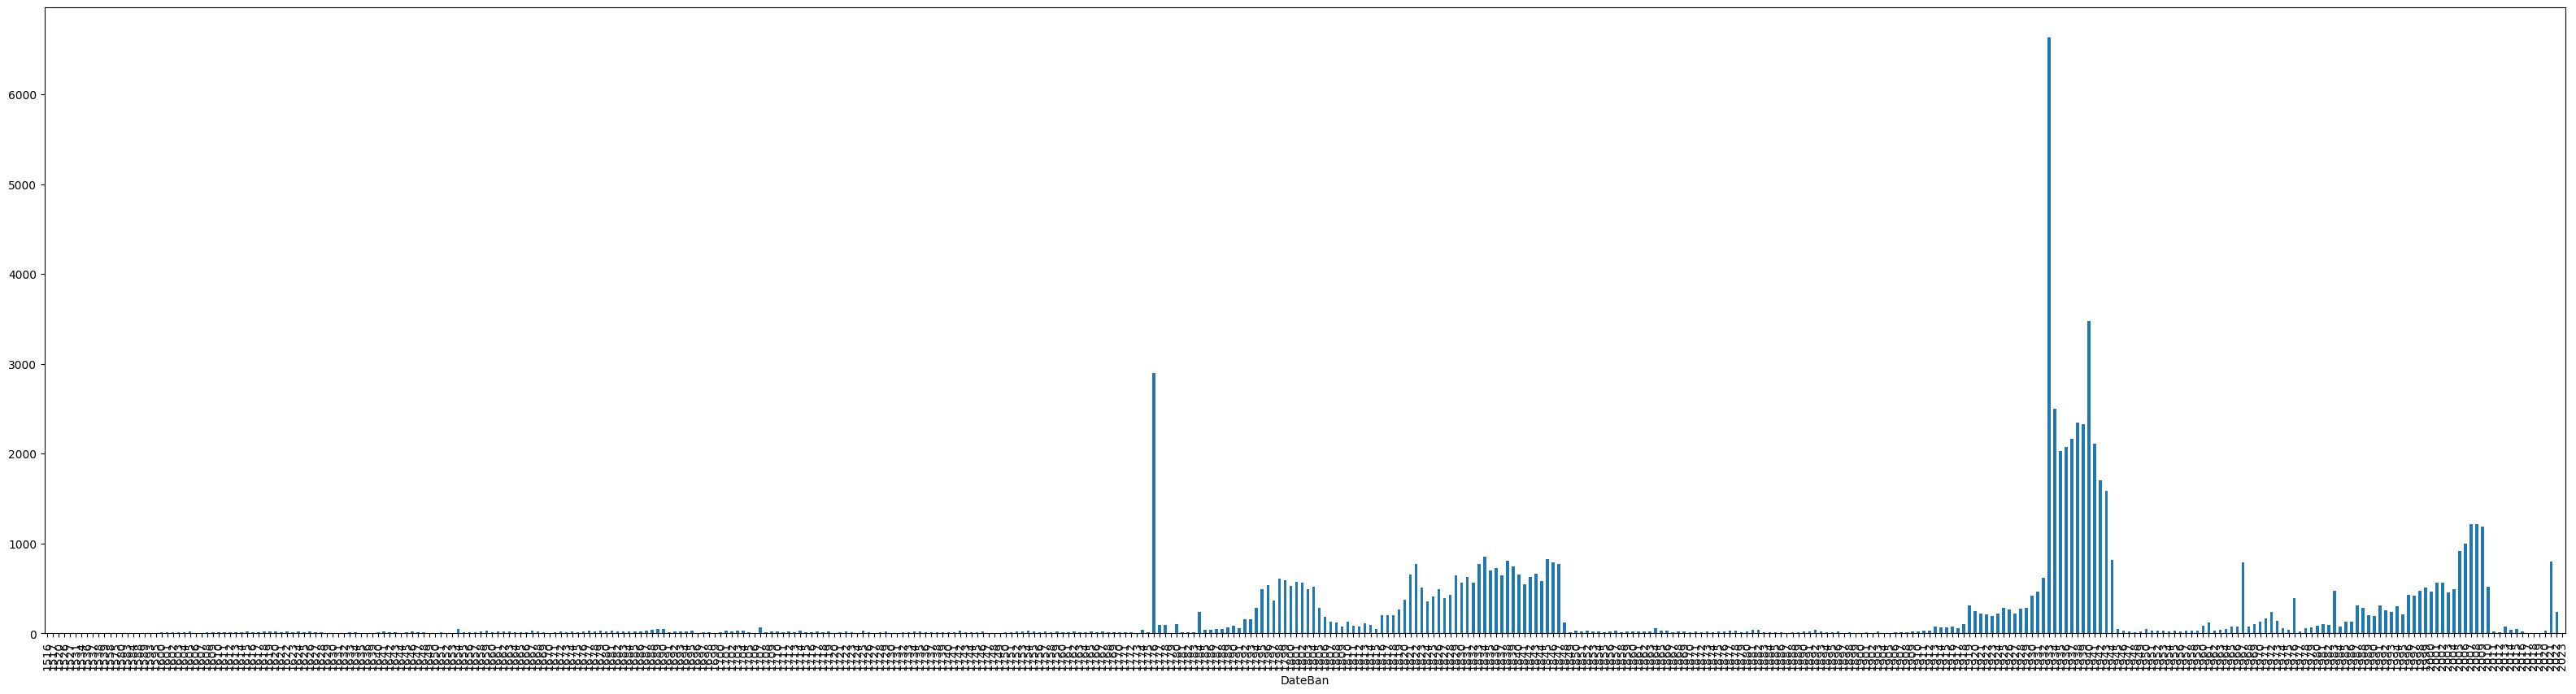

In [38]:
df.groupby('DateBan')\
    .size().plot.bar(figsize=(40,10))

In [62]:
grouped_df = df.groupby(['DateBan', 'Country']).size().to_frame().reset_index()
grouped_df['Count'] = grouped_df[0]
grouped_df['Year'] =  grouped_df['DateBan'].dt.year
grouped_df = grouped_df.sort_values(['Year', 'Count'])
print(grouped_df.info())
grouped_df

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1209
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   DateBan  1210 non-null   period[A-DEC]
 1   Country  1210 non-null   object       
 2   0        1210 non-null   int64        
 3   Count    1210 non-null   int64        
 4   Year     1210 non-null   int64        
dtypes: int64(3), object(1), period[A-DEC](1)
memory usage: 56.7+ KB
None


,DateBan,Country,0,Count,Year
0,1516,FR,1,1,1516
1,1517,VAT,1,1,1517
2,1520,VAT,1,1,1520
3,1526,"DEU, Kaiserreich",1,1,1526
4,1527,"DEU, Nürnberg",1,1,1527
...,...,...,...,...,...
1205,2021,USA,781,781,2021
1207,2022,CMR,2,2,2022
1206,2022,CHN,9,9,2022
1208,2022,USA,225,225,2022


In [63]:
fig = px.bar(grouped_df[grouped_df['Count']>2], x='Year', y='Count', color='Country')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.show()